In [1]:
fileHandler  =  open  ("/home/nfs_data/lupu/CenterPoint-KITTI/gt_ratio",  "r")
# Get list of all lines in file
listOfLines  =  fileHandler.readlines()
# Close file
fileHandler.close()
ratio_list = []
for  line in  listOfLines:
    ratio_list.append(float(line))
    

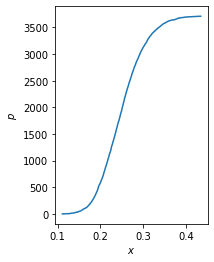

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(0.1)
ratio_list =np.array(ratio_list)
# sort the data:

data_sorted = np.sort(ratio_list)

# calculate the proportional values of samples

p = 1. * np.arange(len(ratio_list))

# plot the sorted data:

fig = plt.figure()

ax2 = fig.add_subplot(122)

ax2.plot(data_sorted, p)

ax2.set_xlabel('$x$')

ax2.set_ylabel('$p$')
ax2.xaxis.set_major_locator(x_major_locator)


/home/lupu123456/nsf/anaconda3/envs/PCDet/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lupu123456/nsf/anaconda3/envs/PCDet/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

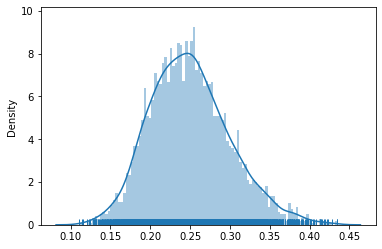

In [3]:
import seaborn as sns
sns.distplot(ratio_list,bins=100, rug=True, hist=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong


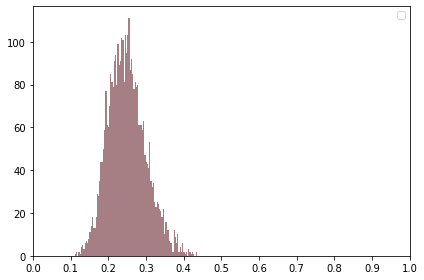

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(0.1)
plt.rcParams['font.sans-serif'] = ['STSong']
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(x_major_locator)

plt.xlim(0,1)
# color='#4c0009',
# color='#003153',
# color='#8f4b28'
#label="ratio_list"
kwargs = dict(color='#4c0009', alpha=0.5,  bins=100)
plt.hist(ratio_list,**kwargs)
plt.legend(fontsize=10,loc = "upper right")
fig.tight_layout()
plt.savefig('running_faeture1.png',dpi=600)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


(8, 3, 400, 352)
0.9686275


Text(0.5, 1.0, 'RandomDrop')

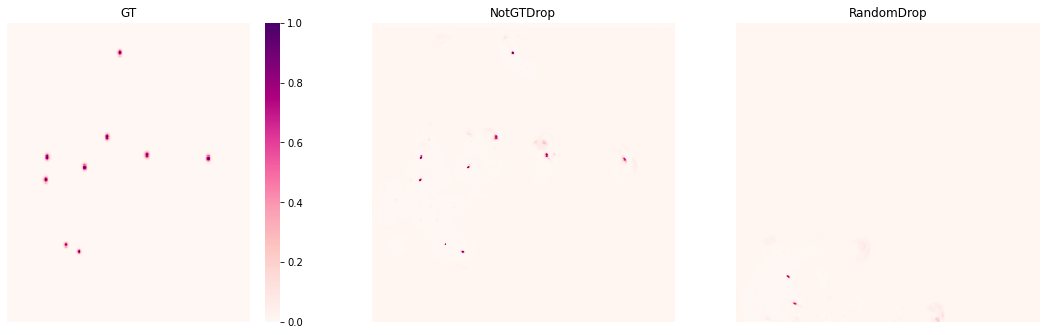

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import palettable#python颜色库
from sklearn import datasets 
import torch

plt.rcParams['font.sans-serif']=['SimHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用于显示中文
pc = torch.load('/home/lupu123456/nsf/CenterPoint-KITTI/tools/visualization/heatmaps_DropNotGTVoxelVFE0.25.pth')
# plt.figure(dpi=200)
# plt.figure(figsize=(20,10))
fig,axes=plt.subplots(1,3)
plt.subplots_adjust(wspace=0.2)
pred_heatmaps = pc['pred_heatmaps'].cpu().detach().numpy()
gt_heatmaps = pc['gt_heatmaps'].cpu().detach().numpy()
pc1 = torch.load('/home/lupu123456/nsf/CenterPoint-KITTI/tools/visualization/heatmaps_DropVoxelVFE0.25.pth')
pred_heatmaps1 = pc1['pred_heatmaps'].cpu().detach().numpy()
print(pred_heatmaps.shape)
print(np.max(pred_heatmaps))
fig.set_size_inches(18.5, 5.5)
# left_ = -1
# right_ = -1
# height_ = -1
# bottom_ = -1
# for i in range(pred_heatmaps.shape[2]):
#         for j in range(pred_heatmaps.shape[3]):
#                 if pred_heatmaps[0][1][i][j] > 0.6:
#                 if left_ == -1:
#                         left_ = i
#                         right_ = i
#                         height_ =j
#                         bottom_ = j     
#         else
df = pd.DataFrame(gt_heatmaps[0][0][0:266,0:312])#设置DataFrame的列标签
p =sns.heatmap(cmap="RdPu",data=df,ax=axes[0],vmax=1,vmin=0,xticklabels=False,yticklabels=False)
p.set_title("GT")
df = pd.DataFrame(pred_heatmaps[0][0][0:266,0:312])#设置DataFrame的列标签
p = sns.heatmap(cmap="RdPu",data=df,ax=axes[1],vmax=1,vmin=0,cbar=False,xticklabels=False,yticklabels=False)
p.set_title("NotGTDrop")
df = pd.DataFrame(pred_heatmaps1[0][0][0:266,0:312])#设置DataFrame的列标签
p = sns.heatmap(cmap="RdPu",data=df,ax=axes[2],vmax=1,vmin=0,cbar=False,xticklabels=False,yticklabels=False)
p.set_title("RandomDrop")

(8, 3, 400, 352)
0.9686275


Text(0.5, 1.0, 'RandomDrop')

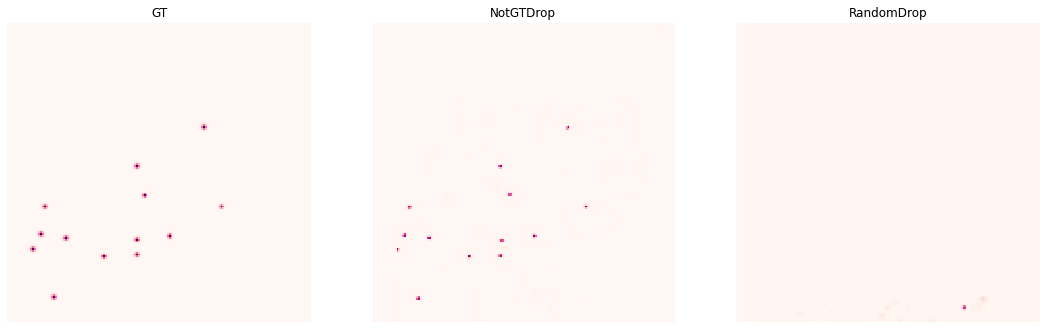

In [6]:
pc = torch.load('/home/lupu123456/nsf/CenterPoint-KITTI/tools/visualization/heatmaps_DropNotGTVoxelVFE0.25.pth')
fig,axes=plt.subplots(1,3)
plt.subplots_adjust(wspace=0.2)
pred_heatmaps = pc['pred_heatmaps'].cpu().detach().numpy()
gt_heatmaps = pc['gt_heatmaps'].cpu().detach().numpy()
print(pred_heatmaps.shape)
print(np.max(pred_heatmaps))
fig.set_size_inches(18.5, 5.5)
# for i in range(pred_heatmaps.shape[2]):
#     for j in range(pred_heatmaps.shape[3]):

        # if pred_heatmaps[0][1][i][j] == 1.0:
        #     exit()
df = pd.DataFrame(gt_heatmaps[0][1][49:211,0:158])#设置DataFrame的列标签
p =sns.heatmap(cmap="RdPu",data=df,ax=axes[0],vmax=1,vmin=0,cbar=False,xticklabels=False,yticklabels=False)
p.set_title("GT")
df = pd.DataFrame(pred_heatmaps[0][1][49:211,0:158])#设置DataFrame的列标签
p = sns.heatmap(cmap="RdPu",data=df,ax=axes[1],vmax=1,vmin=0,cbar=False,xticklabels=False,yticklabels=False)
p.set_title("NotGTDrop")
pc = torch.load('/home/lupu123456/nsf/CenterPoint-KITTI/tools/visualization/heatmaps_DropVoxelVFE0.25.pth')
pred_heatmaps = pc['pred_heatmaps'].cpu().detach().numpy()
df = pd.DataFrame(pred_heatmaps[0][1][49:211,0:158])#设置DataFrame的列标签
p = sns.heatmap(cmap="RdPu",data=df,ax=axes[2],vmax=1,vmin=0,cbar=False,xticklabels=False,yticklabels=False)
p.set_title("RandomDrop")

(8, 3, 400, 352)
0.9686275


Text(0.5, 1.0, 'RandomDrop')

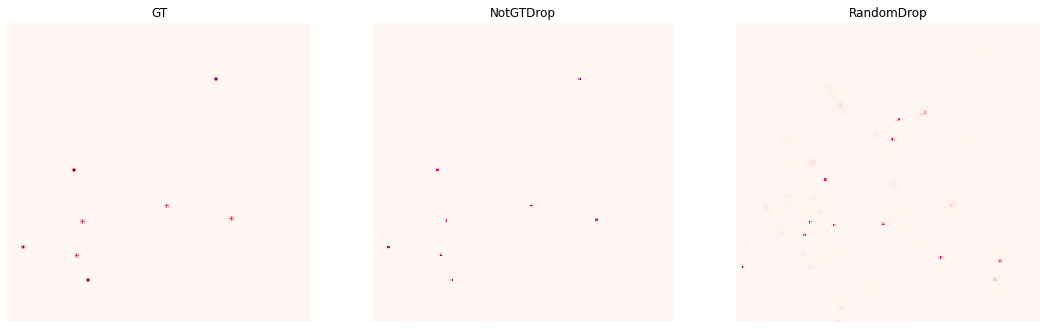

In [7]:
pc = torch.load('/home/lupu123456/nsf/CenterPoint-KITTI/tools/visualization/heatmaps_DropNotGTVoxelVFE0.25.pth')
fig,axes=plt.subplots(1,3)
plt.subplots_adjust(wspace=0.2)
pred_heatmaps = pc['pred_heatmaps'].cpu().detach().numpy()
gt_heatmaps = pc['gt_heatmaps'].cpu().detach().numpy()
print(pred_heatmaps.shape)
print(np.max(pred_heatmaps))
fig.set_size_inches(18.5, 5.5)
# for i in range(pred_heatmaps.shape[2]):
#     for j in range(pred_heatmaps.shape[3]):

        # if pred_heatmaps[0][1][i][j] == 1.0:
        #     exit()
df = pd.DataFrame(gt_heatmaps[0][2][0:210,12:228])#设置DataFrame的列标签
p =sns.heatmap(cmap="RdPu",data=df,ax=axes[0],vmax=1,vmin=0,cbar=False,xticklabels=False,yticklabels=False)
p.set_title("GT")
df = pd.DataFrame(pred_heatmaps[0][2][0:210,12:228])#设置DataFrame的列标签
p = sns.heatmap(cmap="RdPu",data=df,ax=axes[1],vmax=1,vmin=0,cbar=False,xticklabels=False,yticklabels=False)
p.set_title("NotGTDrop")
pc = torch.load('/home/lupu123456/nsf/CenterPoint-KITTI/tools/visualization/heatmaps_DropVoxelVFE0.5.pth')
pred_heatmaps = pc['pred_heatmaps'].cpu().detach().numpy()
df = pd.DataFrame(pred_heatmaps[0][2][0:210,12:228])#设置DataFrame的列标签
p = sns.heatmap(cmap="RdPu",data=df,ax=axes[2],vmax=1,vmin=0,cbar=False,xticklabels=False,yticklabels=False)
p.set_title("RandomDrop")

In [19]:
origin = "77.2723/63.3541/58.7832"
new = "67.7346, 49.1859, 46.9069"
origin = origin.split('/')
new =new.split(', ')
for i in range(3):
    if i == 2:
        print(new[i],)
        continue
    print(new[i],end='/')
result=[]
for i,_ in enumerate(origin):
    result.append(round(float(new[i])-float(origin[i]),4))
print('(',end='')
for i in range(3):
    if i == 2:
        print(result[i],end=')')
        continue
    print(result[i],end='/')

67.7346/49.1859/46.9069
(-9.5377/-14.1682/-11.8763)

In [1]:
origin = "88.0856, 78.1097, 76.6452"
origin = origin.split(', ')
for i in range(3):
    if i == 2:
        print(origin[i],end='')
        continue
    print(origin[i],end='/')

88.0856/78.1097/76.6452

In [1]:
import torch
import sys
from prettytable import PrettyTable
 
table = PrettyTable(['center_x','center_y','center_z','dx','dy','dz','sin','cos'])
pc = torch.load('tools/visualization/loc_lss_list_MeanVFE1.0.pth')
print(len(pc['loc_lss_list']))
pc = pc['loc_lss_list']
a = pc[0].cpu().detach()
a=torch.sum(a,axis=[0, 1], keepdim=False)
for i in pc[1:]:
    i = i.cpu().detach()
    i=torch.sum(i,axis=[0, 1], keepdim=False)
    a +=i
table.add_row(a.tolist())
print(table)
drop_list = ['DropNotGTVoxelVFE','DropNotGTVoxelDensityVFE']
partial_list = ['0.25','0.5','0.75']
head='loc_lss_list_'
path = '/home/nfs_data/lupu/CenterPoint-KITTI/tools/visualization/'
for vfe in drop_list:
    for j in partial_list:
        pro = path+head+vfe+j+'.pth'
        pc = torch.load(pro)
        pc = pc['loc_lss_list']
        a = pc[0].cpu().detach()
        a=torch.sum(a,axis=[0, 1], keepdim=False)
        for i in pc[1:]:
            i = i.cpu().detach()
            i=torch.sum(i,axis=[0, 1], keepdim=False)
            a +=i
        table.add_row(a.tolist())
print(table.get_html_string())

539
+--------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+
|   center_x   |     center_y     |      center_z     |         dx        |         dy        |         dz         |        sin        |       cos        |
+--------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+
| 7446.8828125 | 6142.42041015625 | 2105.136474609375 | 2745.051025390625 | 2559.781494140625 | 1558.6734619140625 | 2830.727294921875 | 3218.00244140625 |
+--------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+
<table>
    <thead>
        <tr>
            <th>center_x</th>
            <th>center_y</th>
            <th>center_z</th>
            <th>dx</th>
            <th>dy</th>
            <th>dz</th>
            <th>sin</

TypeError: add_column() missing 2 required positional arguments: 'fieldname' and 'column'

In [4]:
import torch
import sys
from prettytable import PrettyTable
 
table = PrettyTable(['Name'])
table.add_row(['base'])
drop_list = ['GT-first-','density-aware&GT-first(sqrt)-']
partial_list = ['0.25','0.5','0.75']
for vfe in drop_list:
    for j in partial_list:
        pro = vfe+j
        table.add_row([pro])
print(table.get_html_string())
 

<table>
    <thead>
        <tr>
            <th>Name</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>base</td>
        </tr>
        <tr>
            <td>GT-first-0.25</td>
        </tr>
        <tr>
            <td>GT-first-0.5</td>
        </tr>
        <tr>
            <td>GT-first-0.75</td>
        </tr>
        <tr>
            <td>density-aware&amp;GT-first(sqrt)-0.25</td>
        </tr>
        <tr>
            <td>density-aware&amp;GT-first(sqrt)-0.5</td>
        </tr>
        <tr>
            <td>density-aware&amp;GT-first(sqrt)-0.75</td>
        </tr>
    </tbody>
</table>


: 